## Convolution Neural Network Implementation

Here we will use a pre trained model to classify.

## Required libraries

In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

from os import listdir # Get the list of all files and directories in the root directory
from os.path import isfile, join
from tensorflow.keras.models import Sequential #this work as stack
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

In [2]:
#This is to make a model architecture.

# #Model Architecture
# model = Sequential()

# #Input layer 01
# model.add(Conv2D())
# model.add(MaxPooling2D(pool_size = (2,2)))

# #Hidden Layer 01
# model.add(Conv2D())
# model.add(MaxPooling2D(pool_size = (2,2)))

# #Hidden Layer 02
# model.add(Conv2D())
# model.add(MaxPooling2D(pool_size = (2,2)))

# #Hidden Layer 03
# model.add(Conv2D())
# model.add(MaxPooling2D(pool_size = (2,2)))

# #FLatten Layer
# model.add(Flatten())

# #FCNN
# model.add(Dense(128))
# model.add(Dense(number_of_classes))

In [3]:
#Calling pre-trained model
resnetModel = ResNet50(weights = "imagenet")

102967424/102967424 [==============================] - 1s 0us/step


Load Image

In [4]:
imagePath = "../input/dogimg/dog.jpg"

First loads an image from the file path specified in the imagePath variable. It resizes the image to the target size of (224, 224) pixels. The loaded image is stored in the img variable. 
Convert the image to an array. 
Add a new dimension to the array - This is done because most deep learning models expect the input data to be in the shape of a batch of images.
Preprocess the image - preprocess the input image before it is fed to a pre-trained deep learning model. The preprocessing step varies depending on the model and the type of data. In this case, the function subtracts the mean pixel values of the ImageNet dataset from the input image. This is a common preprocessing step for many pre-trained models trained on the ImageNet dataset. 

In [5]:
img = image.load_img(imagePath, target_size=(224,224))#load an image
x = image.img_to_array(img) #Convert the image to an array
x = np.expand_dims(x, axis = 0)#axix = 0 means row
x = preprocess_input(x)

In [6]:
x

array([[[[-81.939     , -82.779     , -83.68      ],
         [-88.939     , -89.779     , -90.68      ],
         [-85.939     , -88.779     , -88.68      ],
         ...,
         [-73.939     , -70.779     , -71.68      ],
         [-79.939     , -80.779     , -77.68      ],
         [-78.939     , -79.779     , -76.68      ]],

        [[-37.939003  , -31.779     , -33.68      ],
         [-34.939003  , -28.779     , -30.68      ],
         [-35.939003  , -34.779     , -35.68      ],
         ...,
         [-32.939003  , -25.779     , -27.68      ],
         [-27.939003  , -29.779     , -28.68      ],
         [-29.939003  , -31.779     , -30.68      ]],

        [[ -1.939003  ,   1.2210007 ,   0.3199997 ],
         [-21.939003  , -18.779     , -19.68      ],
         [ -5.939003  ,   0.22100067,  -1.6800003 ],
         ...,
         [-76.939     , -70.779     , -72.68      ],
         [-79.939     , -81.779     , -84.68      ],
         [-77.939     , -79.779     , -82.68      ]],

In [7]:
modelPredictions = resnetModel.predict(x)

1/1 [==============================] - 6s 6s/step


Show Image with predicted Class and Accuracy

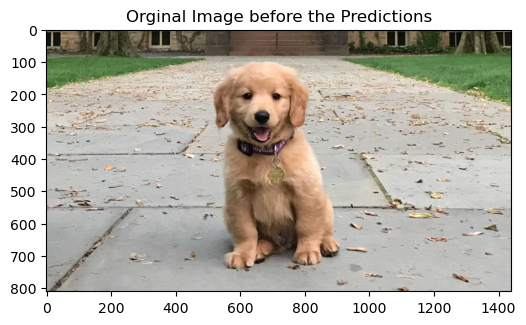

35363/35363 [==============================] - 0s 0us/step
Predicted Class: Golden Retriever
Accuracy : 0.987356424331665


In [8]:
plt.figure(figsize = (6, 4))
imageRead = plt.imread("../input/dogimg/dog.jpg")
plt.imshow(imageRead)
plt.title("Orginal Image before the Predictions")
plt.show()
_, classnames, accuracy = decode_predictions(modelPredictions, top = 3)[0][0]
r = classnames.split("_")
classNamesFirst, classNamesSec = r[0].title(), r[1].title()
# print("Predictions Result is : {}"
#       .format(decode_predictions(modelPredictions, top = 3)[0]))
print("Predicted Class: {} {}\nAccuracy : {}"
      .format(classNamesFirst, classNamesSec, accuracy))

decode_predictions is a function from the Keras API that is used to convert the model's predicted class probabilities into a list of human-readable labels. 
The function returns a list of tuples, where each tuple contains three elements: the index of the predicted class, the name of the predicted class, and the corresponding probability. The number of tuples returned is equal to the top argument. For example, if top is set to 3, the function will return a list of the top 3 predicted classes, sorted by their probabilities in descending order. Each tuple in the list can be accessed using array indexing, like result [0] to get the top prediction, result[1] to get the second top prediction, and so on.

In [9]:
decode_predictions(modelPredictions, top = 3)

[[('n02099601', 'golden_retriever', 0.9873564),
  ('n02099712', 'Labrador_retriever', 0.0054747253),
  ('n02104029', 'kuvasz', 0.0029484397)]]

In [10]:
decode_predictions(modelPredictions, top = 3)[0]

[('n02099601', 'golden_retriever', 0.9873564),
 ('n02099712', 'Labrador_retriever', 0.0054747253),
 ('n02104029', 'kuvasz', 0.0029484397)]

In [11]:
decode_predictions(modelPredictions, top = 3)[0][0]

('n02099601', 'golden_retriever', 0.9873564)

In [12]:
r = classnames.split("_")

In [13]:
classNamesFirst, classNamesSec = r[0].title(), r[1].title()

In [14]:
def drawTextonImage(names, predictions, input_image):
    backgroundColor = [0, 0, 0]
    expandImage = cv.copyMakeBorder(input_image, 0, 0, 0, imageL.shape[1]+300, cv.BORDER_CONSTANT, value = backgroundColor)
    image_width = input_image.shape[1]
    
    for (i, predictions) in enumerate(predictions):
        imageStrings = str(predictions[1])  + " " + str(predictions[2])
        
        cv.putText(expandImage, str(names), (image_width + 50, 50), cv.FONT_HERSHEY_COMPLEX_SMALL, 1, (255, 255, 255), 1)
        cv.putText(expandImage, imageStrings, (image_width + 50, 50+((i+1)*50)), cv.FONT_HERSHEY_COMPLEX_SMALL, 1, (255, 255, 255), 1)
        plt.imshow(expandImage)
    
imagePath = "../input/cat-and-dogs/dataset/test_set/dogs/"
imageFileName = [f for f in listdir(imagePath) if isfile(join(imagePath, f))]

In [15]:
len(imageFileName)

1000

1/1 [==============================] - 0s 27ms/step


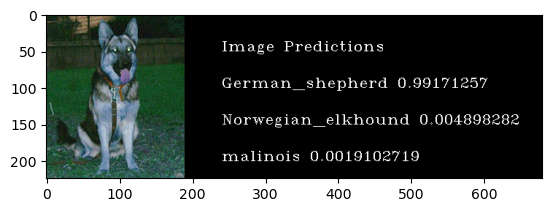

In [16]:
from tensorflow.keras.preprocessing import image
for file in imageFileName:
    img = image.load_img(imagePath+file, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis = 0)
    x = preprocess_input(x)
    
    imageNew = cv.imread(imagePath+file)
    imageL = cv.resize(imageNew, None, fx = 0.5, fy = 0.5, interpolation = cv.INTER_CUBIC)
    
    predictions = resnetModel.predict(x)
    predictions = decode_predictions(predictions, top = 3)[0]
    drawTextonImage("Image Predictions ", predictions, imageL)

Here imports three pre-trained deep learning models (VGG16, InceptionV3, and ResNet50) from the tensorflow.keras.applications module and loads their pre-trained weights trained on the ImageNet dataset. The three models are stored in the variables vgg_model, inception_model, and resnet_model, respectively. These are commonly used for various computer vision tasks such as image classification, object detection, and image segmentation. They are popular due to their high accuracy on benchmark datasets, such as ImageNet, and their ability to generalize well to other datasets and tasks.

In [19]:
from tensorflow.keras.applications import vgg16, inception_v3, resnet50
vgg_model = vgg16.VGG16(weights='imagenet')
inception_model = inception_v3.InceptionV3(weights='imagenet')
resnet_model = resnet50.ResNet50(weights='imagenet')

96112376/96112376 [==============================] - 1s 0us/step


In [ ]:
imagePath = "../input/cat-and-dogs/dataset/test_set/dogs/"
imageFileName = [f for f in listdir(imagePath) if isfile(join(imagePath, f))]

for file in imageFileName:

    from tensorflow.keras.preprocessing import image # Need to reload as opencv2 seems to have a conflict
    img = image.load_img(imagePath+file, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    
    #load image using opencv
    img2 = cv.imread(imagePath+file)
    imageL = cv.resize(img2, None, fx=.5, fy=.5, interpolation = cv.INTER_CUBIC) 
    
    # Get VGG16 Predictions
    preds_vgg_model = vgg_model.predict(x)
    preditions_vgg = decode_predictions(preds_vgg_model, top=3)[0]
    drawTextonImage("VGG16 Predictions", preditions_vgg, imageL) 

    
    # Get ResNet50 Predictions
    preds_resnet = resnet_model.predict(x)
    preditions_resnet = decode_predictions(preds_resnet, top=3)[0]
    drawTextonImage("ResNet50 Predictions", preditions_resnet, imageL) 
    #cv.waitKey(0)

#cv.destroyAllWindows()